# Feature Selection

Student ID: 24292215

Student Name: Lucas Sipos George

---

## Objective

The objective is to compare the performance of _Decision Trees_ and _Logistic Regression_ models on the `Student_Perf.csv` dataset. Both models inherently select features: decision trees through their branching process and logistic regression using L1 regularization. The goal is to assess which model performs better on this specific dataset.

---

## Task 1: Accuracy
For task 1, we will compare the performance of decision trees and logistic regression models on `Student_Perf.csv` dataset. This includes assessing their baseline accuracy, tuning hyperparameters (_max depth_ for decision trees, _L1 regularization_ for logistic regression) to improve performance, and visualizing the results in a chart.

In [269]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

In [270]:
df_student = pd.read_csv("Student_Perf.csv", index_col=0)
df_student.sort_index(inplace=True)
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,outcome
0,0.0,0.0,18,1.0,0.0,0.0,4.0,4.0,0.0,1.0,...,0.0,0.0,3.0,2.0,3.0,0.0,0.0,2.0,4.0,Low
1,0.0,0.0,17,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,4.0,2.0,2.0,0.0,0.0,2.0,2.0,Low
2,0.0,0.0,15,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,0.0,3.0,2.0,1.0,1.0,2.0,2.0,6.0,Low
3,0.0,0.0,15,1.0,0.0,1.0,4.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,0.0,0.0,4.0,0.0,High
4,0.0,0.0,16,1.0,0.0,1.0,3.0,3.0,1.0,0.0,...,0.0,0.0,3.0,2.0,1.0,0.0,1.0,4.0,0.0,High


In [271]:
n = df_student.shape
low, high = df_student["outcome"].value_counts().items()
print(f"Samples: {n[0]} rows and {n[1]} columns")
print(f"Majority: {low[0]} = {low[1]} ({low[1] / n[0] * 100:.1f}%)")
print(f"Minority: {high[0]} = {high[1]} ({high[1] / n[0] * 100:.1f}%)")

Samples: 649 rows and 29 columns
Majority: Low = 373 (57.5%)
Minority: High = 276 (42.5%)


We can see that the majority class is `outcome` feature being _Low_ and minority being _High_.

### Baseline Generalisation Accuracy

In [272]:
def visualisation_classifiers(_x_train, _x_test, _y_train, _y_test, _classifiers, positions):
    """
    Calculates the accuracy over for _classifiers over a number 
    of splits done on the dataset using hold-out testing.
    
    :param _x_train: list(), list of X training data
    :param _x_test: list(), list of X testing data
    :param _y_train: list(), list of y training data
    :param _y_test: list(), list of y testing data
    :param _classifiers: list(), list of classifiers
    :param positions: list(), position for "accuracies" variable
    :return: None
    """
    for i, classifier in enumerate(_classifiers):
        confusions, scores = [], []
        for j in range(SPLITS):
            trained_classifier = classifier.fit(_x_train[j], _y_train[j])
            y_dash = trained_classifier.predict(_x_test[j])

            confusions.append(confusion_matrix(_y_test[j], y_dash))
            scores.append(accuracy_score(_y_test[j], y_dash))
        # for every classifier put the accuracy on the right position
        accuracies[positions[i]] = np.mean(scores)
        print(classifier)
        print(f"{SPLITS}x Accuracy: {accuracies[positions[i]]:.3f}")
        print(f"Confusion Matrix:\n{np.sum(confusions, axis=0)}", end="\n\n")

In [273]:
dt = DecisionTreeClassifier()
# max_iter = 1000 because with the default value throws error
lr = LogisticRegression(max_iter=1000)
classifiers = [dt, lr]
# list of accuracies for baseline and regularised models
accuracies = [0] * 4

In [274]:
y = df_student.pop("outcome").values
X = df_student.values

In [275]:
# number of splits to train and test on
SPLITS = 25
X_train, X_test, y_train, y_test = [], [], [], []
for i in range(SPLITS):
    _X_train, _X_test, _y_train, _y_test = train_test_split(X, y, test_size=1 / 3, random_state=i)
    X_train.append(_X_train)
    X_test.append(_X_test)
    y_train.append(_y_train)
    y_test.append(_y_test)
visualisation_classifiers(X_train, X_test, y_train, y_test, classifiers, [0, 2])

DecisionTreeClassifier()
25x Accuracy: 0.635
Confusion Matrix:
[[1350  996]
 [ 986 2093]]

LogisticRegression(max_iter=1000)
25x Accuracy: 0.712
Confusion Matrix:
[[1618  728]
 [ 832 2247]]



As we can see the `Logistic Regression` is doing better than `Decision Tree`.

### Grid Search for Decision Tree

We will try to find an optimal value for the `min_sample_leaf` parameter.

In [276]:
param_grid = {"min_samples_leaf": [1, 3, 5, 10, 15, 20, 25, 30, 40, 50, 75, 100]}

# grid search with respect to accuracy
grid_search = GridSearchCV(dt, param_grid, cv=6, n_jobs=-1, scoring="accuracy")
grid_search = grid_search.fit(X_train[0], y_train[0])
scores_df = pd.DataFrame(grid_search.cv_results_)
# sort by their scores
scores_df = scores_df.sort_values(by=["rank_test_score"]).reset_index(drop="index")
# print only the values needed
scores_df[["mean_test_score", "param_min_samples_leaf"]]

,mean_test_score,param_min_samples_leaf
0,0.680556,10
1,0.678241,15
2,0.673611,20
3,0.671296,75
4,0.668981,30
5,0.657407,40
6,0.657407,5
7,0.655093,3
8,0.655093,100
9,0.652778,25


From the table above we get that **10** is the best parameter values for `min_samples_leaf`, but we want to see if there are any better. Below we try again, but for all the values around **10** inclusively. 

In [277]:
# integer parameters in [6,15)
param_grid = {"min_samples_leaf": np.arange(6, 15)}

grid_search = GridSearchCV(dt, param_grid, cv=6, n_jobs=-1, scoring="accuracy")
grid_search = grid_search.fit(X_train[0], y_train[0])
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df = scores_df.sort_values(by=["rank_test_score"]).reset_index(drop="index")
scores_df[["mean_test_score", "param_min_samples_leaf"]]

,mean_test_score,param_min_samples_leaf
0,0.699074,13
1,0.692130,14
2,0.682870,10
3,0.680556,9
4,0.675926,12
5,0.673611,7
6,0.664352,8
7,0.662037,11
8,0.657407,6


As we can see there are better parameters than **10**, so we choose the best one, **13**, and test it on the `visualisation_classifiers`.

In [278]:
# create a Decision Tree with the best parameters from the grid search
dt_new = DecisionTreeClassifier(**grid_search.best_params_)
visualisation_classifiers(X_train, X_test, y_train, y_test, [dt_new], [1])

DecisionTreeClassifier(min_samples_leaf=13)
25x Accuracy: 0.668
Confusion Matrix:
[[1432  914]
 [ 887 2192]]



We've tested the Decision Tree created from the best parameters (`min_samples_leaf=13`), and we can see significant improvement in _accuracy_.

### Grid Search for Logistic Regression

We will try to find an optimal value for the `C` parameter. We set `penalty` to `l1` because that's a problem requirement and `solver` to `liblinear` because the default value isn't compatible with `l1`.

In [279]:
param_grid = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 25, 30, 50, 75, 100, 1000, 10000],
              "penalty": ["l1"],
              "solver": ["liblinear"]}
grid_search = GridSearchCV(lr, param_grid, cv=6, scoring="accuracy")
grid_search = grid_search.fit(X_train[0], y_train[0])
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df = scores_df.sort_values(by=["rank_test_score"]).reset_index(drop="index")
scores_df[["mean_test_score", "param_C"]]

,mean_test_score,param_C
0,0.708333,15.0000
1,0.708333,25.0000
2,0.708333,30.0000
3,0.708333,50.0000
4,0.708333,10000.0000
5,0.706019,20.0000
6,0.706019,75.0000
7,0.706019,100.0000
8,0.706019,1000.0000
9,0.703704,10.0000


From the table above we can see that a lot of values have the same _accuracy_. There should be no need in verifying further into the matter, but for the sake of showing this we will run the grid search with the closes values to **15**.

In [280]:
param_grid = {"C": np.arange(11, 20),
              "penalty": ["l1"],
              "solver": ["liblinear"]}
grid_search = GridSearchCV(lr, param_grid, cv=6, scoring="accuracy")
grid_search = grid_search.fit(X_train[0], y_train[0])
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df = scores_df.sort_values(by=["rank_test_score"]).reset_index(drop="index")
scores_df[["mean_test_score", "param_C"]]

,mean_test_score,param_C
0,0.708333,15
1,0.708333,16
2,0.708333,17
3,0.708333,18
4,0.706019,13
5,0.706019,14
6,0.706019,19
7,0.703704,11
8,0.703704,12


As said before, there is no improvement in accuracy, but the grid search will take the lowest value, which is **14** now.

In [281]:
lr_new = LogisticRegression(**grid_search.best_params_)
visualisation_classifiers(X_train, X_test, y_train, y_test, [lr_new], [3])

LogisticRegression(C=15, penalty='l1', solver='liblinear')
25x Accuracy: 0.710
Confusion Matrix:
[[1644  702]
 [ 873 2206]]



We've tested the Logistic Regression created from the best parameters (`C=14`), and we can see that it got a little worse than the default Logistic Regression.

### Report on Accuracies

In [282]:
# bind labels to values
results = dict(zip(["Tree Baseline", "Tree Reg", "Logistic Baseline", "Logistic Reg"], accuracies))
results

{'Tree Baseline': 0.6346543778801843,
 'Tree Reg': 0.6680184331797234,
 'Logistic Baseline': 0.7124423963133643,
 'Logistic Reg': 0.7096774193548387}

Now we can clearly see that `Tree Reg` is doing significantly better than `Tree Baseline`, and `Logistic Baseline` is doing a little better than `Logistic Reg`.

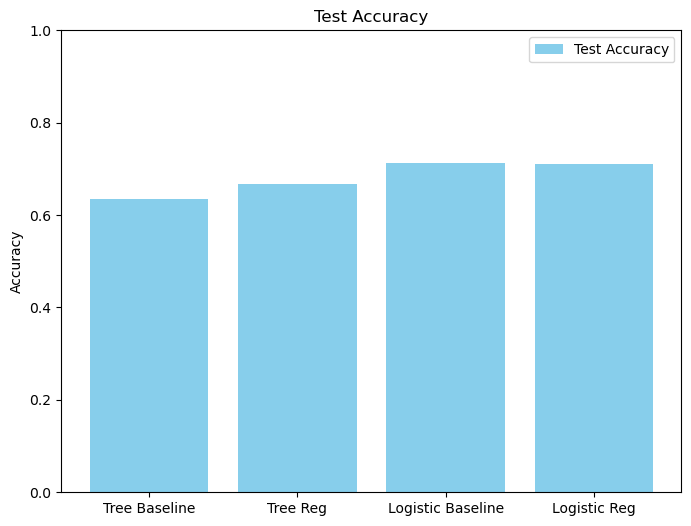

In [283]:
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend(["Test Accuracy"])
plt.ylim(0, 1)
plt.show()

Above we can see how all the _accuracies_ with respect to each technique. And again there is the clear representation of which one is doing better and which one is doing worse (the explanation is above).

---

## Task 2: Feature Selection

For task 2, we will analyze feature selection using regularized Decision Trees and Logistic Regression. We will compare selected features, evaluate the stability of selections across runs, and examine the agreement between the two models. This will provide insights into feature importance and model behavior. 

In [284]:
def print_features(features, num=True):
    """
    Prints the features nicely.
    
    :param features: List[str, int|str], list of pairs, e.g.: 0 - feature, 1 - importance/coefficient | usage
    :param num: bool, if the second value of the pairs is number `num` is True, otherwise False
    :return: None
    """
    # if there are numbers, format with precision of 3
    indent = ".3f" if num else ""
    _length = len(features)
    # for odd numbers print the 'odd' one last
    _offset = _length % 2
    for index in range(_length // 2):
        print(f"{str(index + 1) + ".":<4}{features[index][0]:<10} -> {features[index][1]:<10{indent}}", end="")
        print(
            f"{str(index + 1 + _offset + _length // 2) + ".":<4}{features[index + _offset + _length // 2][0]:<10} -> {features[index + _offset + _length // 2][1]:<10{indent}}")
    if _length % 2 == 1:
        print(
            f"{str(_length // 2 + 1) + ".":<4}{features[_length // 2][0]:<10} -> {features[_length // 2][1]:<10{indent}}")
    print()

In [285]:
dt_new.fit(X_train[0], y_train[0])

# create a dataframe with feature and feature importance sorted by feature importance
select_features_dt = pd.DataFrame({
    "Feature": df_student.columns,
    "Importance": dt_new.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Filter out features with zero importance
selected_features_dt = select_features_dt[select_features_dt["Importance"] > 0].values
# Filter out features with positive importance
not_selected_features_dt = select_features_dt[select_features_dt["Importance"] <= 0].values
print(f"{len(selected_features_dt)} selected features (Decision Tree):")
print_features(selected_features_dt)
print(f"{len(not_selected_features_dt)} zero importance features (Decision Tree):")
print_features(not_selected_features_dt)

13 selected features (Decision Tree):
1.  failures   -> 0.234     8.  internet   -> 0.048     
2.  Medu       -> 0.156     9.  sex        -> 0.028     
3.  absences   -> 0.155     10. Walc       -> 0.019     
4.  Dalc       -> 0.115     11. school     -> 0.018     
5.  higher     -> 0.082     12. famsup     -> 0.011     
6.  health     -> 0.071     13. studytime  -> 0.008     
7.  famsize    -> 0.056     

15 zero importance features (Decision Tree):
1.  schoolsup  -> 0.000     9.  famrel     -> 0.000     
2.  guardian   -> 0.000     10. freetime   -> 0.000     
3.  paid       -> 0.000     11. goout      -> 0.000     
4.  activities -> 0.000     12. Pstatus    -> 0.000     
5.  nursery    -> 0.000     13. address    -> 0.000     
6.  reason     -> 0.000     14. age        -> 0.000     
7.  traveltime -> 0.000     15. Fedu       -> 0.000     
8.  romantic   -> 0.000     



If we run the cell above multiple times we find out that the features selected by the Decision Tree classifier differ from run to run. The only number of features selected that I've got through the runs are **13** or **12**. I will talk more about it later on.

In [286]:
lr_new.fit(X_train[0], y_train[0])

# create a dataframe with feature and coefficient sorted by coefficient
select_features_lr = pd.DataFrame({
    "Feature": df_student.columns,
    "Coefficient": lr_new.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Filter out features with zero/negative coefficients
selected_features_lr = select_features_lr[select_features_lr["Coefficient"] > 0].values
# Filter out features with positive coefficients
not_selected_features_lr = select_features_lr[select_features_lr["Coefficient"] <= 0].values
print(f"{len(selected_features_lr)} selected features (Logistic Regression):")
print_features(selected_features_lr)
print(f"{len(not_selected_features_lr)} zero/negative coefficient features (Logistic Regression):")
print_features(not_selected_features_lr)

14 selected features (Logistic Regression):
1.  failures   -> 1.583     8.  guardian   -> 0.300     
2.  schoolsup  -> 0.934     9.  health     -> 0.219     
3.  school     -> 0.508     10. famsup     -> 0.190     
4.  Pstatus    -> 0.473     11. goout      -> 0.113     
5.  Dalc       -> 0.442     12. absences   -> 0.076     
6.  sex        -> 0.416     13. Fedu       -> 0.073     
7.  famsize    -> 0.412     14. nursery    -> 0.032     

14 zero/negative coefficient features (Logistic Regression):
1.  Walc       -> -0.008    8.  studytime  -> -0.170    
2.  reason     -> -0.012    9.  age        -> -0.204    
3.  freetime   -> -0.027    10. famrel     -> -0.208    
4.  romantic   -> -0.100    11. internet   -> -0.384    
5.  traveltime -> -0.134    12. address    -> -0.502    
6.  activities -> -0.142    13. Medu       -> -0.528    
7.  paid       -> -0.166    14. higher     -> -2.823    



Now, if we run the cell above, we can see that every time we run it we get the same values and the number of features selected by Logistic Regression is **14**. Something interesting that we can see here is that, compared to Decision Tree, we don't have 0 values, but we have negative ones, something that we don't see when using Decision Tree.

In [287]:
# number of iterations
ITERATIONS = 100
# mapping of selected values for both, decision tree, logistic regression and overall
mapping_values_selected, mapping_selected_b, mapping_selected_dt, mapping_selected_lr = {}, {}, {}, {}
for i in range(ITERATIONS):
    dt_new.fit(X_train[0], y_train[0])
    lr_new.fit(X_train[0], y_train[0])

    select_features_dt = pd.DataFrame({
        "Feature": df_student.columns,
        "Importance": dt_new.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    select_features_lr = pd.DataFrame({
        "Feature": df_student.columns,
        "Coefficient": lr_new.coef_[0]
    }).sort_values(by="Coefficient", ascending=False)

    selected_features_dt = select_features_dt[select_features_dt["Importance"] > 0].values
    selected_features_lr = select_features_lr[select_features_lr["Coefficient"] > 0].values
    
    all_selected_features = list(set([x for x, y in selected_features_dt] + [x for x, y in selected_features_lr]))
    c_both, c_dt, c_lr = 0, 0, 0
    for i in range(len(all_selected_features)):
        if all_selected_features[i] in selected_features_dt and all_selected_features[i] in selected_features_lr:
            mapping_selected_b[all_selected_features[i]] = mapping_selected_b.get(all_selected_features[i], 0) + 1
            all_selected_features[i] = (all_selected_features[i], "Both")
            c_both += 1
        elif all_selected_features[i] in selected_features_dt:
            mapping_selected_dt[all_selected_features[i]] = mapping_selected_dt.get(all_selected_features[i], 0) + 1
            all_selected_features[i] = (all_selected_features[i], "DT")
            c_dt += 1
        else:
            mapping_selected_lr[all_selected_features[i]] = mapping_selected_lr.get(all_selected_features[i], 0) + 1
            all_selected_features[i] = (all_selected_features[i], "LR")
            c_lr += 1
        mapping_values_selected[all_selected_features[i][0]] = (mapping_values_selected
                                                                .get(all_selected_features[i][0], 0) + 1)
    all_selected_features = sorted(all_selected_features, key=lambda x: x[1])
    # TODO: if you uncomment these lines you can see details about everything at every iteration
    # TODO: if you decide to uncomment change ITERATION variable to a lower one
    # print(f"Both -> {c_both:<5}Decision Tree -> {c_dt:<5} Logistic Regression -> {c_lr}")
    # print("Features selected by classifier:")
    # print_features(all_selected_features, False)
print(f"Frequency of all values selected over iterations ({ITERATIONS}):")
print_features(sorted(list(mapping_values_selected.items()), key=lambda x: x[0].lower()), False)
print(f"Frequency of 'Both' values selected over iterations ({ITERATIONS}):")
print_features(sorted(list(mapping_selected_b.items()), key=lambda x: x[0].lower()), False)
print(f"Frequency of 'DT' values selected over iterations ({ITERATIONS}):")
print_features(sorted(list(mapping_selected_dt.items()), key=lambda x: x[0].lower()), False)
print(f"Frequency of 'LR' values selected over iterations ({ITERATIONS}):")
print_features(sorted(list(mapping_selected_lr.items()), key=lambda x: x[0].lower()), False)

Frequency of all values selected over iterations (100):
1.  absences   -> 100       11. internet   -> 100       
2.  Dalc       -> 100       12. Medu       -> 100       
3.  failures   -> 100       13. nursery    -> 100       
4.  famsize    -> 100       14. Pstatus    -> 100       
5.  famsup     -> 100       15. school     -> 100       
6.  Fedu       -> 100       16. schoolsup  -> 100       
7.  goout      -> 100       17. sex        -> 100       
8.  guardian   -> 100       18. studytime  -> 100       
9.  health     -> 100       19. Walc       -> 100       
10. higher     -> 100       

Frequency of 'Both' values selected over iterations (100):
1.  absences   -> 100       5.  famsup     -> 41        
2.  Dalc       -> 100       6.  health     -> 100       
3.  failures   -> 100       7.  school     -> 100       
4.  famsize    -> 100       8.  sex        -> 100       

Frequency of 'DT' values selected over iterations (100):
1.  higher     -> 100       4.  studytime  -> 100       

If you uncomment the lines below `TODO` the first, number of iterations (`ITERATIONS`), lines show us the number of features that were chose by decision tree, logistic regression and both of them, and after that every feature selected and by whom.

If you choose not to uncomment those lines we get 4 "tables" that represent the following, a frequency table of:
1. all the features over all the iterations.
2. the features selected by both Decision Tree and Logistic Regression over all iterations.
3. the features selected by the Decision Tree over all iterations.
4. the features selected by the Logistic Regression over all iterations.

The first table tells us that every time we ran the `fit` function we got the same features selected.

The second table shows us that one of the classifiers is not always taking the `famsup` feature. I won't say the value of `famsup` because it is inconsistent.

The third table tells us that Decision Tree is the classifier that chooses `famsup` feature only sometimes, and if we look into the second table we find out how many times `famsup` feature was selected by Decision Tree.

The forth table gives us about the same type of information as the previous one, respectively that Logistic Regression chooses `famsup` every interation, also interpreted as chooses `famsup` (value of `famsup` cannot be specified because it is inconsistent) times more than Decision Tree.

We can see that the features chosen by classifiers are all consistent expect for `famsup` which is inconsistent for Decision Tree classifier. We can also see that the features selected by both are `Dalc, famsize, absences, school, sex, failures, famsup, health`. But they also have different features selected, which are a bit more for Logistic Regression (**6/7**) than for Decision Tree (**5**) such as:
- for Decision Tree `internet, higher, studytime, Medu, Walc`
- for Logistic Regression `Pstatus, schoolsup, Fedu, goout, nursery, guardian` and sometimes `famsup`
